# DAMASK tutorial for cold rolling test with regridding/openphase

- creating necessary inputs for damask
- defining the elastoplastic model (with powerlaw) for tensile test
- runing the damask jobs
- do the regridding
- run openphase simulation for recrystallization

here more option is given to the user to select from damask python package itself.

Author: Yang Bai

Date  : 06.09.2022

## Importing libraries and creatign Project

In [1]:
from pyiron_continuum import Project
from damask import Rotation # this will be used in material configuration

### create a 'project' to manage all the configurations for a tensile test

In [2]:
pr = Project('rollingopenphase')
pr.remove_jobs(silently=True) # automatically delete the existing project folder

### Creating the Damask job

In [3]:
job = pr.create.job.ROLLING('damask_job')

#### for a damask job, one needs:
- geometry information(i.e., the mesh)
- material configuration(material.yaml)
- boundary conditions(i.e., loading.yaml)

### For material configuration
#### for elastoplastic material

In [4]:
elasticity = pr.continuum.damask.Elasticity(type= 'Hooke', C_11= 106.75e9,
                                   C_12= 60.41e9, C_44=28.34e9)

# for plastic deformation, we use the power law
plasticity = pr.continuum.damask.Plasticity(type='phenopowerlaw',
                                            N_sl=[12], a_sl=2.25,
                                            atol_xi=1.0, dot_gamma_0_sl=0.001,
                                            h_0_sl_sl=75e6, h_sl_sl=[1, 1, 1.4, 1.4, 1.4, 1.4, 1.4],
                                            n_sl=20, output=['xi_sl'],
                                            xi_0_sl=[31e6], xi_inf_sl=[63e6])


#### for material configuration, you need
- phase
- roation
- homogenization

In [5]:
grains = 4 # for the total number of grains
grids = 4 # for the grids number

phase = pr.continuum.damask.Phase(composition='Aluminum', lattice= 'cF',
                         output_list=['F', 'P', 'F_e', 'F_p', 'L_p', 'O'],
                         elasticity=elasticity,plasticity=plasticity)
rotation = pr.continuum.damask.Rotation(Rotation.from_random, grains)

homogenization = pr.continuum.damask.Homogenization(method='SX', 
                                                     parameters={'N_constituents': 1,
                                                                 "mechanical": {"type": "pass"}})

# now you can define your material.yaml configuration
material = pr.continuum.damask.Material([rotation],['Aluminum'], phase, homogenization)

# now you can save your material to your job
job.material = material

## For geometry information

In [6]:
grid = pr.continuum.damask.Grid.via_voronoi_tessellation(box_size=1.0e-5, grid_dim=grids, num_grains=grains)

# save the geometry information to your job
job.grid = grid 

## Configure the rolling test (boundary conditions)

In [7]:
job.rolling_parameters(number_passes=3,# number of rolling procedure
                       height_reduction=0.2,# compresseion height
                       rolling_speed=2.0e-3,# rolling speed 1/s
                       contact_length=1.0,
                       increments=50,# time steps for each rolling
                       regridding=True)

## Do the rolling test

working direction is: /home/by/Projects/Github/pyiron_continuum/notebooks/rollingopenphase/damask_job_hdf5/damask_job
Remove all the results ...
--------------------------------------------------------------
Do the rolling-1 test ...
Run damask simulation from  /home/by/Projects/Github/pyiron_continuum/notebooks/rollingopenphase/damask_job_hdf5/damask_job
solver: {mechanical: spectral_basic}

loadstep:
  - boundary_conditions:
      mechanical:
        P:
          - [0, x, x]
          - [x, x, x]
          - [x, x, x]
        dot_F:
          - [x, 0, 0]
          - [0, 0, 0]
          - [0, 0, -0.002]
    discretization: {t: 33.333333333333336, N: 50}
    f_out: 5
    f_restart: 5

Using rolling-1.yaml as loading
Damask command is: DAMASK_grid -g damask.vti -l rolling-1.yaml > rolling-1.log


 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00


--------------------------------------------------------------
Do the rolling-2 test ...
Run damask simulation from  /home/by/Projects/Github/pyiron_continuum/notebooks/rollingopenphase/damask_job_hdf5/damask_job
solver: {mechanical: spectral_basic}

loadstep:
  - boundary_conditions:
      mechanical:
        P:
          - [0, x, x]
          - [x, x, x]
          - [x, x, x]
        dot_F:
          - [x, 0, 0]
          - [0, 0, 0]
          - [0, 0, -0.002]
    discretization: {t: 66.66666666666667, N: 100}
    f_out: 5
    f_restart: 5

------------------------
regridding geometry ...
initial RVE size:	 [1.e-05 1.e-05 1.e-05]
regridded RVE size:	 [1.07068010e-05 1.00000000e-05 9.33333333e-06]
initial grid seeds:	 [4 4 4]
regridded grid seeds:	 [5 4 4]
finding the nearest neighbors...
A regridding history file is created.
------------------------
Regridding process is completed.
restart DAMASK (regridded) simulation from  /home/by/Projects/Github/pyiron_continuum/notebooks/rolling

 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00


--------------------------------------------------------------
Do the rolling-3 test ...
Run damask simulation from  /home/by/Projects/Github/pyiron_continuum/notebooks/rollingopenphase/damask_job_hdf5/damask_job
solver: {mechanical: spectral_basic}

loadstep:
  - boundary_conditions:
      mechanical:
        P:
          - [0, x, x]
          - [x, x, x]
          - [x, x, x]
        dot_F:
          - [x, 0, 0]
          - [0, 0, 0]
          - [0, 0, -0.002]
    discretization: {t: 100.00000000000001, N: 150}
    f_out: 5
    f_restart: 5

------------------------
regridding geometry ...
initial RVE size:	 [1.07068010e-05 1.00000000e-05 9.33333333e-06]
regridded RVE size:	 [1.23444474e-05 1.00000000e-05 8.08888889e-06]
initial grid seeds:	 [5 4 4]
regridded grid seeds:	 [6 5 4]
finding the nearest neighbors...
The regridding history file is extended (index = 1).
------------------------
Regridding process is completed.
restart DAMASK (regridded) simulation from  /home/by/Projects/G

 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00


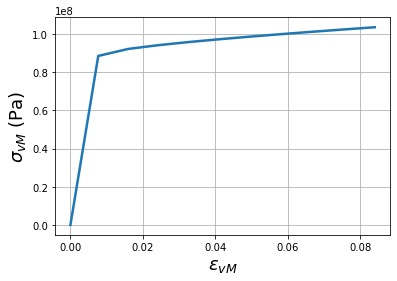

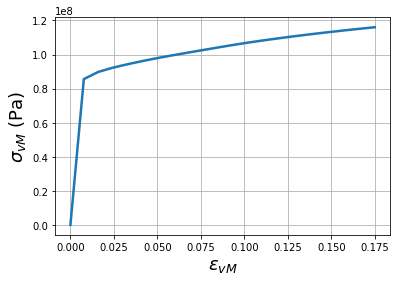

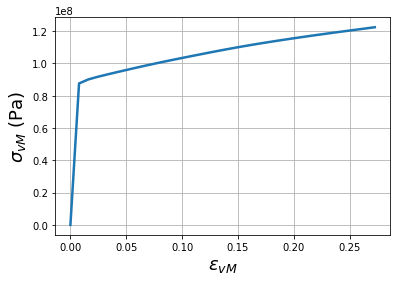

In [8]:
job.run_rolling()

In [9]:
job.write_openphase_config(step=1000,dt=1.0e-4)

min size is: 8.08888888888894e-06


In [10]:
job.run_openphase()

running openphase from  /home/by/Projects/Github/pyiron_continuum/notebooks/rollingopenphase/damask_job_hdf5/damask_job
